In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# 1. Combining DataFrames with Pandas

#### In the data folder, there are two survey data files: survey2001.csv and survey2002.csv. Read the data into Python and combine the files to make one new data frame. Create a plot of average plot weight by year grouped by sex. Export your results as a CSV and make sure it reads back into Python properly.

In [2]:
survey_1 = pd.read_csv('recitation/data/survey2001.csv')
survey_2 = pd.read_csv('recitation/data/survey2002.csv')
survey_2 = survey_2.reset_index(drop=True)

In [3]:
new_survey = pd.concat([survey_1, survey_2], axis=0)

/Users/danielleskinner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
group = new_survey.groupby(['year', 'sex']).mean()['wgt'].unstack()
group

sex,F,M
year,,
2001,36.221914,36.481844
2002,34.016799,37.589905


Text(0,0.5,'Weight')

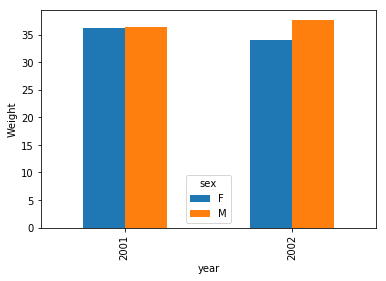

In [5]:
group.plot(kind='bar')
plt.ylabel('Weight')

In [6]:
group.to_csv('grouped_data.csv')

In [7]:
read_in = pd.read_csv('grouped_data.csv')
read_in

,year,F,M
0,2001,36.221914,36.481844
1,2002,34.016799,37.589905


# 2. Data Workflows and Automation

#### What happens if we don’t include the pass statement?

#### Rewrite the loop so that the animals are separated by commas, not new lines (Hint: You can concatenate strings using a plus sign. For example, print(string1 + string2) outputs ‘string1string2’).


In [8]:
animals = ['lion', 'tiger', 'crocodile', 'vulture', 'hippo']
for creature in animals:
    pass

In [9]:
print('The loop variable is now: ' + creature)

The loop variable is now: hippo


In [10]:
for creature in animals:

SyntaxError: unexpected EOF while parsing (<ipython-input-10-eac8f13983eb>, line 1)

If the pass statement is not included, the loop has nothing to do! 

In [11]:
for creature in animals:
    if creature == animals[-1]:
        print(creature + '.', end='')
    else: 
        print(creature + ', ', end='')

lion, tiger, crocodile, vulture, hippo.

# 3. Data Ingest & Visualization - Matplotlib & Pandas

In [12]:
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime

In [3]:
df = pd.read_csv('dskinner01.txt', sep='\t')
df.columns = ['agency_cd', 'site_no', 'datetime', 'tz_cd', 'gauge_height', 'status']
df

,agency_cd,site_no,datetime,tz_cd,gauge_height,status
0,USGS,6730200,2013-09-01 00:15,MDT,57,A
1,USGS,6730200,2013-09-01 00:30,MDT,57,A
2,USGS,6730200,2013-09-01 00:45,MDT,57,A
3,USGS,6730200,2013-09-01 01:00,MDT,57,A
4,USGS,6730200,2013-09-01 01:15,MDT,57,A
5,USGS,6730200,2013-09-01 01:30,MDT,57,A
6,USGS,6730200,2013-09-01 01:45,MDT,57,A
7,USGS,6730200,2013-09-01 02:00,MDT,57,A
8,USGS,6730200,2013-09-01 02:15,MDT,57,A
9,USGS,6730200,2013-09-01 02:30,MDT,56,A


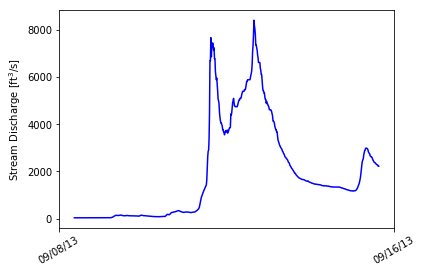

In [14]:
date = []
for i in df['datetime']:
    date.append(i[8:])
date = np.array(date)
date
gauge = df['gauge_height']

flood_date = []
gauge_flood = []
for i in range(len(date)):
    if (int(date[i][:-6]) >= 9) & (int(date[i][:-6]) <= 15):
        flood_date.append(date[i])
        gauge_flood.append(gauge[i])
        
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(2013, 9, 9)
date2 = datetime.date(2013, 9, 16)
delta = datetime.timedelta(minutes=15)
dates = drange(date1, date2, delta)

fig, ax = plt.subplots()
ax.plot_date(dates, gauge_flood, 'b-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.set_ylabel('Stream Discharge [ft$^{3}$/s]')
plt.show()

In [15]:
time_of_day = []
for i in date:
    if i[3:] not in time_of_day:
        time_of_day.append(i[3:])
time_of_day
date

array(['01 00:15', '01 00:30', '01 00:45', ..., '30 23:15', '30 23:30',
       '30 23:45'],
      dtype='<U8')

95
191
287
383
479
575
671
767
863
959
1055
1151
1247
1343
1439
1535
1631
1727
1823
1918


ValueError: x and y must have same first dimension, but have shapes (96,) and (95,)

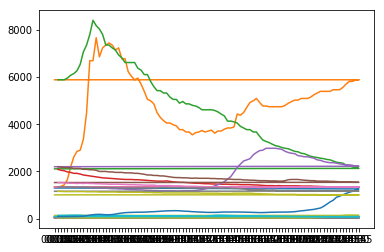

In [17]:
fig, ax = plt.subplots()
y=[]
for i in range(len(date)):
    y.append(gauge[i])
    if date[i][3:] == '00:00':
        print(i)
        ax.plot(time_of_day, y)
        y=[]
    if date[i] == date[-1]:
        print('End')
        x = time_of_day
        x.remove('00:00')
        ax.plot(x, y)
        

The last plot above isn't working for some reason, the arrays are different lengths and I can't figure out why!